Exploration der Daten

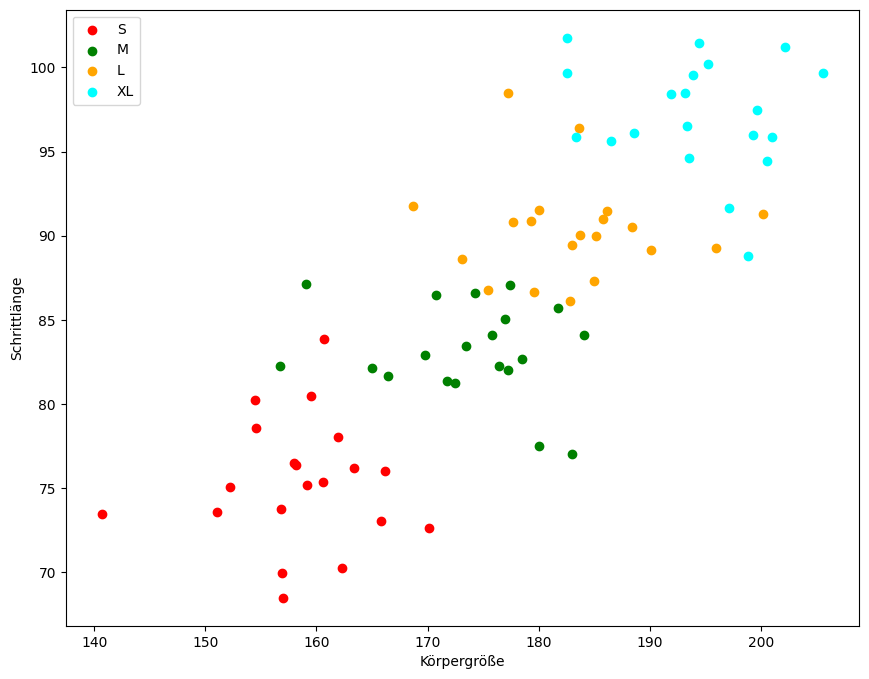

<Figure size 1024x800 with 0 Axes>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# CSV-Datei laden
data = pd.read_csv('Rahmenhoehe.csv')

# Daten nach Ergebnis filtern
s = data[data['Rahmengroesse'] == 'S']
m = data[data['Rahmengroesse'] == 'M']
l = data[data['Rahmengroesse'] == 'L']
xl = data[data['Rahmengroesse'] == 'XL']

# Diagramm erstellen
plt.scatter(s['Koerpergroesse'], s['Schrittlaenge'], color='red', label="S")
plt.scatter(m['Koerpergroesse'], m['Schrittlaenge'], color='green', label="M")
plt.scatter(l['Koerpergroesse'], l['Schrittlaenge'], color='orange', label="L")
plt.scatter(xl['Koerpergroesse'], xl['Schrittlaenge'], color='cyan', label="XL")

# Achsenbeschriftungen hinzufügen
plt.xlabel('Körpergröße')
plt.ylabel('Schrittlänge')

plt.legend()
plt.figure(figsize=(10.24, 8))
plt.rcParams['figure.figsize'] = [10.24, 8]
#
# Diagramm anzeigen
plt.show()


Welche Rahmengröße wäre sinvoll für einen Kunden mit einer Körpergröße von 163cm und eine Schrittlänge von 84 cm?

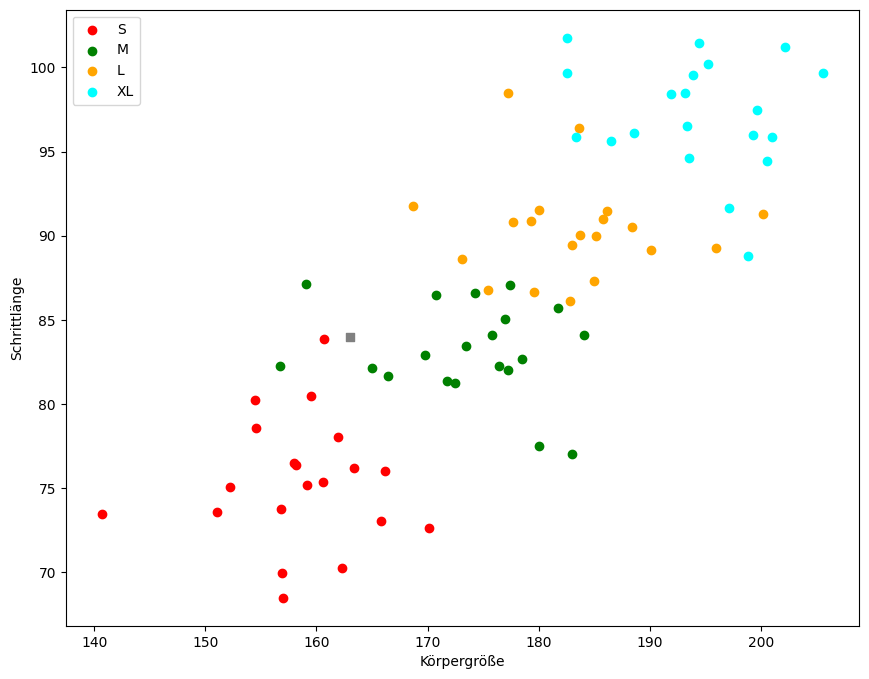

<Figure size 1024x800 with 0 Axes>

In [5]:
# Diagramm erstellen
plt.scatter(s['Koerpergroesse'], s['Schrittlaenge'], color='red', label="S")
plt.scatter(m['Koerpergroesse'], m['Schrittlaenge'], color='green', label="M")
plt.scatter(l['Koerpergroesse'], l['Schrittlaenge'], color='orange', label="L")
plt.scatter(xl['Koerpergroesse'], xl['Schrittlaenge'], color='cyan', label="XL")
plt.scatter(163, 84, color='grey',marker="s")

# Achsenbeschriftungen hinzufügen
plt.xlabel('Körpergröße')
plt.ylabel('Schrittlänge')

plt.legend()
plt.figure(figsize=(10.24, 8))
plt.rcParams['figure.figsize'] = [10.24, 8]
#
# Diagramm anzeigen
plt.show()


Nun man könnte schauen welcher Datenpunkt an dem gesuchten an dichtesten dran ist ! Dazu ist der Abstand des Datenpunktes zu allen Datenpunkten zu bestimmen und der kleinste Wert genommen!

In [6]:
import math

def distance(x1, y1, x2, y2):
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist

In [7]:
import pandas as pd

d = pd.DataFrame(columns=["distance","Koerpergroesse","Schrittlaenge","Rahmenhöhe"])

# Iterate through the rows of the DataFrame using iterrows()
for index, row in data.iterrows():
    d.loc[len(d)] = [distance(163,84,row["Koerpergroesse"],row["Schrittlaenge"]),row["Koerpergroesse"],row["Schrittlaenge"],row["Rahmengroesse"]]
    
d.sort_values(by=["distance"], inplace=True)
print(d)


     distance  Koerpergroesse  Schrittlaenge Rahmenhöhe
42   2.315534          160.69          83.84          S
48   2.753924          165.04          82.15          M
50   4.182439          166.48          81.68          M
62   4.971086          159.51          80.46          S
14   5.075717          159.02          87.15          M
..        ...             ...            ...        ...
70  39.012840          200.59          94.44         XL
23  39.058820          199.67          97.45         XL
73  39.810764          201.00          95.87         XL
64  42.823564          202.20         101.24         XL
6   45.425687          205.63          99.69         XL

[80 rows x 4 columns]


Bei k=1 wäre also die Entscheidung "S", für k=3 wäre jedoch die Entscheidung "M", wir müssen also die Qualität unseres Systems bewerten können.

Zunächst müssen wir unseren Datensatz teilen in Lerndaten und Testdaten

In [8]:
test = data[60:]
learn = data[:60]
test

,Koerpergroesse,Schrittlaenge,Rahmengroesse
60,159.16,75.21,S
61,184.10,84.11,M
62,159.51,80.46,S
63,170.72,86.45,M
64,202.20,101.24,XL
65,170.14,72.60,S
66,185.84,90.98,L
67,195.25,100.21,XL
68,186.53,95.63,XL
69,154.58,78.57,S


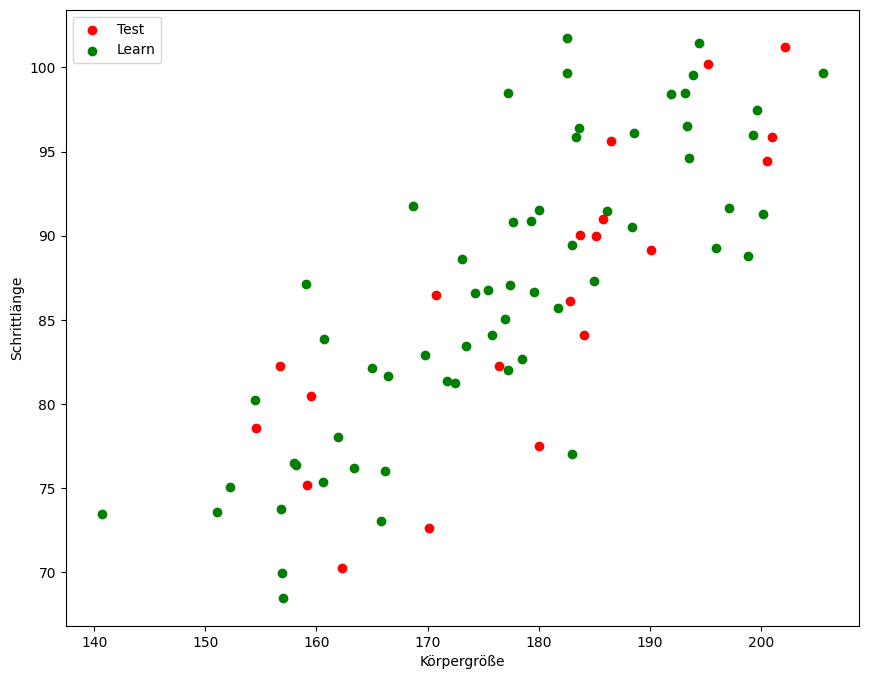

<Figure size 1024x800 with 0 Axes>

In [9]:


# Diagramm erstellen
plt.scatter(test['Koerpergroesse'], test['Schrittlaenge'], color='red', label="Test")
plt.scatter(learn['Koerpergroesse'], learn['Schrittlaenge'], color='green', label="Learn")

# Achsenbeschriftungen hinzufügen
plt.xlabel('Körpergröße')
plt.ylabel('Schrittlänge')

plt.legend()
plt.figure(figsize=(10.24, 8))
plt.rcParams['figure.figsize'] = [10.24, 8]
#
# Diagramm anzeigen
plt.show()


Starten wir mit k=1 und schauen wir nach wie gut unser Modell ist also wie viele richtige TP Treffer ist gibt und wie viele FP Treffer es gibt

In [19]:
import pandas as pd

ok=0;
err=0

for i in range(0,len(test)):

    d = pd.DataFrame(columns=["distance","Koerpergroesse","Schrittlaenge","Rahmenhöhe"])
    testData = test.iloc[i]
    for index, row in learn.iterrows():
        d.loc[len(d)] = [distance(testData["Koerpergroesse"],testData["Schrittlaenge"],row["Koerpergroesse"],row["Schrittlaenge"]),row["Koerpergroesse"],row["Schrittlaenge"],row["Rahmengroesse"]]
        
    d.sort_values(by=["distance"], inplace=True)

    print("Vorhersage "+d.iloc[0]["Rahmenhöhe"]+ " Ist-Rahmenhöhe "+testData["Rahmengroesse"])
    if (d.iloc[0]["Rahmenhöhe"]==testData["Rahmengroesse"]):
        print ("OK")
        ok=ok+1
    else:
        print ("Fehler")
        err=err+1

print ("OK "+str(ok)+"   Fehler "+str(err))


Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage L Ist-Rahmenhöhe M
Fehler
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage M Ist-Rahmenhöhe L
Fehler
Vorhersage S Ist-Rahmenhöhe M
Fehler
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage L Ist-Rahmenhöhe L
OK
OK 17   Fehler 3


Ok, ändern wir k auf 3 uns schauen uns das Ergebnis an !

In [11]:
import pandas as pd

ok=0;
err=0

for i in range(0,len(test)):

    d = pd.DataFrame(columns=["distance","Koerpergroesse","Schrittlaenge","Rahmenhöhe"])
    testData = test.iloc[i]
    for index, row in learn.iterrows():
        d.loc[len(d)] = [distance(testData["Koerpergroesse"],testData["Schrittlaenge"],row["Koerpergroesse"],row["Schrittlaenge"]),row["Koerpergroesse"],row["Schrittlaenge"],row["Rahmengroesse"]]
        
    d.sort_values(by=["distance"], inplace=True)
    
    dd=d[:3]
    r = dd["Rahmenhöhe"].value_counts().idxmax()

    print("Vorhersage "+r+ " Ist-Rahmenhöhe "+testData["Rahmengroesse"])
    if (r==testData["Rahmengroesse"]):
        print ("OK")
        ok=ok+1
    else:
        print ("Fehler")
        err=err+1

print ("OK "+str(ok)+"   Fehler "+str(err))


Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage L Ist-Rahmenhöhe M
Fehler
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage S Ist-Rahmenhöhe M
Fehler
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage L Ist-Rahmenhöhe L
OK
OK 18   Fehler 2


In [24]:
dd[4:7]

,distance,Koerpergroesse,Schrittlaenge,Rahmenhöhe
15,4.460516,179.35,90.86,L
59,4.652795,188.37,90.53,L
55,4.828271,181.73,85.68,M


In [12]:
import pandas as pd

ok=0;
err=0

for i in range(0,len(test)):

    d = pd.DataFrame(columns=["distance","Koerpergroesse","Schrittlaenge","Rahmenhöhe"])
    testData = test.iloc[i]
    for index, row in learn.iterrows():
        d.loc[len(d)] = [distance(testData["Koerpergroesse"],testData["Schrittlaenge"],row["Koerpergroesse"],row["Schrittlaenge"]),row["Koerpergroesse"],row["Schrittlaenge"],row["Rahmengroesse"]]
        
    d.sort_values(by=["distance"], inplace=True)
    
    dd=d[:5]
    r = dd["Rahmenhöhe"].value_counts().idxmax()

    print("Vorhersage "+r+ " Ist-Rahmenhöhe "+testData["Rahmengroesse"])
    if (r==testData["Rahmengroesse"]):
        print ("OK")
        ok=ok+1
    else:
        print ("Fehler")
        err=err+1

print ("OK "+str(ok)+"   Fehler "+str(err))


Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage L Ist-Rahmenhöhe M
Fehler
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage L Ist-Rahmenhöhe XL
Fehler
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage S Ist-Rahmenhöhe M
Fehler
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage L Ist-Rahmenhöhe L
OK
OK 17   Fehler 3


In [13]:
import pandas as pd

ok=0;
err=0

for i in range(0,len(test)):

    d = pd.DataFrame(columns=["distance","Koerpergroesse","Schrittlaenge","Rahmenhöhe"])
    testData = test.iloc[i]
    for index, row in learn.iterrows():
        d.loc[len(d)] = [distance(testData["Koerpergroesse"],testData["Schrittlaenge"],row["Koerpergroesse"],row["Schrittlaenge"]),row["Koerpergroesse"],row["Schrittlaenge"],row["Rahmengroesse"]]
        
    d.sort_values(by=["distance"], inplace=True)
    
    dd=d[:7]
    r = dd["Rahmenhöhe"].value_counts().idxmax()

    print("Vorhersage "+r+ " Ist-Rahmenhöhe "+testData["Rahmengroesse"])
    if (r==testData["Rahmengroesse"]):
        print ("OK")
        ok=ok+1
    else:
        print ("Fehler")
        err=err+1

print ("OK "+str(ok)+"   Fehler "+str(err))


Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage S Ist-Rahmenhöhe M
Fehler
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage L Ist-Rahmenhöhe L
OK
OK 19   Fehler 1


In [14]:
import pandas as pd

ok=0;
err=0

for i in range(0,len(test)):

    d = pd.DataFrame(columns=["distance","Koerpergroesse","Schrittlaenge","Rahmenhöhe"])
    testData = test.iloc[i]
    for index, row in learn.iterrows():
        d.loc[len(d)] = [distance(testData["Koerpergroesse"],testData["Schrittlaenge"],row["Koerpergroesse"],row["Schrittlaenge"]),row["Koerpergroesse"],row["Schrittlaenge"],row["Rahmengroesse"]]
        
    d.sort_values(by=["distance"], inplace=True)
    
    dd=d[:9]
    r = dd["Rahmenhöhe"].value_counts().idxmax()

    print("Vorhersage "+r+ " Ist-Rahmenhöhe "+testData["Rahmengroesse"])
    if (r==testData["Rahmengroesse"]):
        print ("OK")
        ok=ok+1
    else:
        print ("Fehler")
        err=err+1

print ("OK "+str(ok)+"   Fehler "+str(err))


Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage S Ist-Rahmenhöhe M
Fehler
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage L Ist-Rahmenhöhe L
OK
OK 19   Fehler 1


In [15]:
import pandas as pd

ok=0;
err=0

for i in range(0,len(test)):

    d = pd.DataFrame(columns=["distance","Koerpergroesse","Schrittlaenge","Rahmenhöhe"])
    testData = test.iloc[i]
    for index, row in learn.iterrows():
        d.loc[len(d)] = [distance(testData["Koerpergroesse"],testData["Schrittlaenge"],row["Koerpergroesse"],row["Schrittlaenge"]),row["Koerpergroesse"],row["Schrittlaenge"],row["Rahmengroesse"]]
        
    d.sort_values(by=["distance"], inplace=True)
    
    dd=d[:11]
    r = dd["Rahmenhöhe"].value_counts().idxmax()

    print("Vorhersage "+r+ " Ist-Rahmenhöhe "+testData["Rahmengroesse"])
    if (r==testData["Rahmengroesse"]):
        print ("OK")
        ok=ok+1
    else:
        print ("Fehler")
        err=err+1

print ("OK "+str(ok)+"   Fehler "+str(err))


Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage M Ist-Rahmenhöhe S
Fehler
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage S Ist-Rahmenhöhe M
Fehler
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage L Ist-Rahmenhöhe L
OK
OK 18   Fehler 2


In [16]:
import pandas as pd

ok=0;
err=0

for i in range(0,len(test)):

    d = pd.DataFrame(columns=["distance","Koerpergroesse","Schrittlaenge","Rahmenhöhe"])
    testData = test.iloc[i]
    for index, row in learn.iterrows():
        d.loc[len(d)] = [distance(testData["Koerpergroesse"],testData["Schrittlaenge"],row["Koerpergroesse"],row["Schrittlaenge"]),row["Koerpergroesse"],row["Schrittlaenge"],row["Rahmengroesse"]]
        
    d.sort_values(by=["distance"], inplace=True)
    
    dd=d[:13]
    r = dd["Rahmenhöhe"].value_counts().idxmax()

    print("Vorhersage "+r+ " Ist-Rahmenhöhe "+testData["Rahmengroesse"])
    if (r==testData["Rahmengroesse"]):
        print ("OK")
        ok=ok+1
    else:
        print ("Fehler")
        err=err+1

print ("OK "+str(ok)+"   Fehler "+str(err))


Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage M Ist-Rahmenhöhe S
Fehler
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage S Ist-Rahmenhöhe M
Fehler
Vorhersage XL Ist-Rahmenhöhe XL
OK
Vorhersage XL Ist-Rahmenhöhe L
Fehler
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage M Ist-Rahmenhöhe M
OK
Vorhersage L Ist-Rahmenhöhe L
OK
Vorhersage S Ist-Rahmenhöhe S
OK
Vorhersage L Ist-Rahmenhöhe L
OK
OK 17   Fehler 3


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Laden Sie die CSV-Datei in ein Pandas DataFrame.
df = pd.read_csv('Rahmenhoehe.csv')

# Aufteilen der Features und Labels
X = df[['Koerpergroesse', 'Schrittlaenge']]
y = df['Rahmengroesse']

# Teilen Sie die Daten in Trainings- und Testdaten auf.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalieren Sie die Merkmale.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Erstellen und Trainieren des KNN-Modells mit k=3.
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Verwenden Sie das trainierte Modell, um Vorhersagen für die Testdaten zu treffen.
y_pred = knn.predict(X_test)

y_test_row = np.array(y_test).reshape(1, -1)

print(y_pred)  # Beispiel Ergebnis: ["L" "S"]
print(y_test_row)  # Beispiel Ergebnis: ["L" "S"]


['XL' 'L' 'S' 'S' 'XL' 'XL' 'L' 'XL' 'XL' 'M' 'M' 'S' 'XL' 'XL' 'XL' 'S']
[['XL' 'L' 'S' 'S' 'L' 'XL' 'L' 'XL' 'XL' 'L' 'M' 'S' 'XL' 'L' 'XL' 'S']]


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Berechnen Sie die Vorhersagen für die Testdaten.
y_pred = knn.predict(X_test)

# Reihenfolge der Klassenlabels abrufen
class_order = knn.classes_

# Drucken der Reihenfolge der Klassenlabels
print('Klassenreihenfolge:', class_order)

# Berechnen Sie die Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Berechnen Sie die Precision
precision = precision_score(y_test, y_pred, average=None)
print('Precision:', precision)

# Berechnen Sie den Recall
recall = recall_score(y_test, y_pred, average=None)
print('Recall:', recall)

# Berechnen Sie den F1-Score
f1 = f1_score(y_test, y_pred, average=None)
print('F1-Score:', f1)


Klassenreihenfolge: ['L' 'M' 'S' 'XL']
Accuracy: 0.8125
Precision: [1.   0.5  1.   0.75]
Recall: [0.4 1.  1.  1. ]
F1-Score: [0.57142857 0.66666667 1.         0.85714286]


Es gibt verschiedene Metriken, die zur Bewertung der Leistung von Klassifikatoren wie dem KNeighborsClassifier verwendet werden können. Hier sind einige gängige Metriken:

1. Accuracy (Genauigkeit): Die Genauigkeit misst den Prozentsatz der korrekten Vorhersagen im Verhältnis zur Gesamtzahl der Vorhersagen. Es ist eine einfache und häufig verwendete Metrik, aber sie kann irreführend sein, wenn die Daten ungleichmäßig verteilt sind.

2. Precision (Präzision) und Recall (Rückruf): Diese beiden Metriken beziehen sich auf das Verhältnis von korrekten positiven Vorhersagen zu allen tatsächlichen positiven Instanzen. Precision misst, wie oft das Modell richtig vorhergesagt hat, während Recall misst, wie viele der tatsächlichen positiven Fälle das Modell gefunden hat.

3. F1-Score: Der F1-Score ist das harmonische Mittel zwischen Präzision und Rückruf und gibt daher ein ausgewogenes Maß für die Leistung des Modells.

**Accuracy:**

Accuracy = $\frac{TP + TN}{TP + FP + FN + TN}$

**Precision:**

Precision = $\frac{TP}{TP + FP}$

**Recall:**

Recall = $\frac{TP}{TP + FN}$

**F1 Score:**

F1 Score = $2*\frac{precision * recall}{precision + recall}$



Hinweis: In diesen Formeln stehen TP, FP, TN und FN für True Positives, False Positives, True Negatives und False Negatives, beziehungsweise.



Angenommen von 16 Testwerten, werden 13 korrekt vorhergesagt, so it $$TP=TN=13$$ und $$FN=FP=3$$

**Accuracy:**

Accuracy = $\frac{TP + TN}{TP + FP + FN + TN}=\frac{13 + 13}{13 + 3 + 3 + 13}=81.25%$

**Precision:**

Precision = $\frac{TP}{TP + FP}=\frac{13}{16}=81.25%$

**Recall:**

Recall = $\frac{TP}{TP + FN}=\frac{13}{16}=81.25%$

**F1 Score:**

F1 Score = $2*\frac{precision * recall}{precision + recall}=2*\frac{0.8125 * 0.8125}{0.8125 + 0.8125}=81.25$